### Logistic Regression

Logistic Regression is a supervised machine learning algorithm that is used to predict the probability of an event or observation outcome. It is a popular statistical method used for binary classification problems in machine learning.

Unlike Linear Regression, which predicts continuous outcomes, Logistic Regression predicts the probability of a binary class outcome (e.g., 0 or 1) based on one or more predictor variables.

#### Sigmoid Function:
$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

Logistic Regression is widely used in various applications such as:
- Spam detection
- Credit risk analysis
- Medical diagnosis

Despite its simplicity, Logistic Regression can be quite effective, especially when the relationship between the predictor variable and the outcome is approximately linear.

However, it may not perform well with highly non-linear relationships, for which more complex models like Decision Trees or Neural Networks might be more suitable.

In Logistic Regression, every model returns a **likelihood value**. The model with the **maximum likelihood** is considered the better model.


### Why is Maximum Likelihood a Good Parameter for Model Evaluation?

Maximum Likelihood Estimation (MLE) is used to identify the model parameters that make the observed data most probable. Essentially, for each data point, the model computes the probability that it belongs to its actual class. If the probability is high, the model is correctly predicting the class. If the probability is low, the prediction is likely incorrect.

Thus, **the model with the highest likelihood value** is considered the best fit for the data. In Logistic Regression, this corresponds to the decision boundary (or line) that maximizes the likelihood of the observed data.

---

### Problem: Product of Probabilities Can Cause Underflow

When calculating likelihood, we multiply several probabilities together—one for each data point. If you have many data points, the product of these small probability values can become extremely small, leading to **underflow** (i.e., the number becomes too small for the computer to represent).

---

### Solution: Use Log-Likelihood

To address underflow, instead of multiplying probabilities, we take the **log of the probabilities** and sum them:

- Logarithms convert multiplication into addition.
- This avoids underflow and simplifies computation.

However, the log of a probability (which lies between 0 and 1) is always **negative**. To deal with this:

- We take the **negative of the log-likelihood**.
- Now, instead of maximizing the likelihood, we **minimize the negative log-likelihood**.

This transformation allows us to use standard optimization techniques efficiently while avoiding numerical issues.



### Log Loss (Binary Cross-Entropy)

**Formula:**

$$
\text{Log Loss} = -\frac{1}{n} \sum_{i=1}^{n} \left[ y_i \cdot \log(\hat{y}_i) + (1 - y_i) \cdot \log(1 - \hat{y}_i) \right]
$$

### Breakdown:

* $n$: total number of samples
* $y_i$: true label for sample $i$
* $\hat{y}_i$: predicted probability of class 1 for sample $i$

This is the loss function used in binary classification problems. It measures the performance of a classification model whose output is a probability value between 0 and 1.


$$
\hat{y}_i = \sigma(z_i)
$$

$$
z_i = \beta_0 + \beta_1 x_{1i} + \beta_2 x_{2i} + \dots + \beta_n x_{ni}
$$


### Explanation:

* $\hat{y}_i$: predicted probability for the $i^{th}$ data point
* $\sigma(z_i)$: sigmoid function applied to $z_i$
* $z_i$: linear combination of input features and their corresponding coefficients

The goal is to find values of parameters **β₀, β₁, β₂, ...** such that the total loss **L** is minimized.

---

### Step 1: Introduction to the Sigmoid Function

When making predictions, we use the **sigmoid function**:

$$
\sigma(z) = \frac{1}{1 + e^{-z}}
$$

The sigmoid function ensures that our predictions are not just hard values (0 or 1), but probabilities between **0 and 1**.

---

### Step 2: Maximum Likelihood Concept

Using maximum likelihood:

- For each training data point, we calculate the probability that it belongs to a particular class (based on the sigmoid output).
- These probabilities are multiplied across all data points.
- However, multiplying many small probability values leads to **very small numbers**, increasing the risk of **underflow**.

---

### Step 3: Log Loss to Avoid Underflow

To prevent underflow:

- We take the **log** of the probabilities (since `log` turns products into sums).
- Log values of numbers between 0 and 1 are negative, so we **multiply by -1** to keep the loss positive.
- The final formula works for both classes (0 and 1) in a unified way.

---

### Logical Rule for Each Data Point

- If the true label `y = 1`: use `-log(ŷ)`
- If the true label `y = 0`: use `-log(1 - ŷ)`

This is generalized in the log loss formula.

---

### Derivative of Sigmoid

The derivative of the sigmoid function is:

$$
\sigma'(z) = \sigma(z) \cdot (1 - \sigma(z))
$$

This is useful for gradient descent during model training.



### Multiclass Classification

Multiclass classification is a machine learning task that involves classifying instances into **more than two categories**.

---

### How Logistic Regression Handles Multiclass Classification:

There are two main approaches:

1. **One-vs-Rest (OvR)** or **One-vs-All (OvA)**
2. **Multinomial Logistic Regression (Softmax Regression)**

---

### 1. One-vs-Rest (OvR) Approach

- For a classification problem with **K classes**, build **K binary logistic regression models**.
- Each model predicts the probability of one class **vs** all other classes.
- At prediction time:
  - Run the input through all K models.
  - Select the class whose model gives the **highest probability**.

**Disadvantage:**
- Not efficient for **large number of classes**.

---

### 2. Multinomial Logistic Regression (Softmax Regression)

This approach uses the **Softmax function** instead of sigmoid.

#### **Softmax Function:**
$$
\sigma(z_i) = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}}
$$

- Converts logits into a **probability distribution** across multiple classes.
- Ensures that:
  $$
  \sum_{i=1}^{K} \sigma(z_i) = 1
  $$

#### Example:
If you have logits `z = [1, 2, 3]`:

$$
\sigma(1) = \frac{e^1}{e^1 + e^{2} + e^{3}}, \quad
\sigma(2) = \frac{e^{2}}{e^4 + e^{2} + e^{3}}, \quad
\sigma(3) = \frac{e^{3}}{e^4 + e^{2} + e^{3}}
$$

---

### Comparison: Sigmoid vs. Softmax

- **Sigmoid** → Used in **binary** classification.
- **Softmax** → Used in **multiclass** classification.

---

### Loss Function for Softmax (Cross Entropy Loss)

$$
L = - \frac{1}{n} \sum_{i=1}^{n} \sum_{k=1}^{K} y_{ik} \cdot \log(\hat{y}_{ik})
$$

Where:
- `K` = number of classes
- `n` = number of training samples

We minimize this loss using **gradient descent**.

---

### Parameter Update using Gradient Descent:

$$
\beta_j^{new} = \beta_j - \eta \cdot \frac{\partial L}{\partial \beta_j}
$$

After optimization, you will have:
- **K weight vectors** (one per class)
- For `3 classes`, each weight vector has 3 parameters (`β₀, β₁, β₂`)

---

### Making Predictions:

For an input vector `x`, calculate logits:

$$
z_1 = \beta_0^{(1)} + \beta_1^{(1)}x_1 + \beta_2^{(1)}x_2 \\
z_2 = \beta_0^{(2)} + \beta_1^{(2)}x_1 + \beta_2^{(2)}x_2 \\
z_3 = \beta_0^{(3)} + \beta_1^{(3)}x_1 + \beta_2^{(3)}x_2
$$

Then apply **Softmax** to these `z` values to get probabilities.  
The class with the **highest probability** is the predicted output.

---

### When to Use What?

| Scenario                                | Use OvR                  | Use Softmax Regression     |
|-----------------------------------------|---------------------------|-----------------------------|
| Classes are **not mutually exclusive** | Yes                       | No                          |
| Handling **class imbalance**           | Yes                       | Less suitable               |
| Computational efficiency is **critical** | No                        | Yes                         |
| Output **interpretability** is needed   | No                        | Yes                         |

---

### Probability vs. Likelihood:

- **Probability:** Given a parameter, calculate how likely a specific event is.
- **Likelihood:** Given an event, assess how justified a parameter is.



### Maximum Likelihood Estimation (MLE)

MLE is a method used to estimate the parameters of a statistical model.

---

#### **What is MLE?**

- You have observed data.
- You **know** the type of distribution (e.g., Bernoulli, Normal) that the data follows.
- But you **don’t know** the **parameter values** of the distribution.
- Your goal is to find **parameter values** that **maximize the likelihood** of the observed data.

This process is called **Maximum Likelihood Estimation (MLE).**

---

### How MLE is Used in Machine Learning

MLE is used to **train parametric models** (e.g., logistic regression, linear regression, Naive Bayes, etc.).

> Non-parametric models don’t have a fixed set of parameters, so MLE doesn't apply to them.

---

### Steps in MLE:

1. **Determine the probability distribution** of the target variable `Y` given `X`.
2. **Select a model** which is **parametric** in nature.
3. **Initialize parameters**: `β₀, β₁, ..., βn`
4. **Define a Likelihood Function**

   For example, in case of **Bernoulli Distribution**:

   $$
   P(y) = p^y \cdot (1-p)^{(1-y)}
   $$

5. **Find parameter values** that **maximize the likelihood function** (or minimize the negative log-likelihood).

---

## Assumptions of Logistic Regression:

1. The dependent variable is **binary**.
2. **Observations are independent**.
3. **Linear relationship** between independent variables and the **log odds**.
4. **No multicollinearity** among predictors.
5. Requires a **large sample size**.

---

### Odds & Log Odds

- **Odds** = Probability of event / Probability of not happening = \( \frac{P}{1 - P} \)
- **Log Odds** (also called **logit**):

$$
\text{logit}(P) = \log\left(\frac{P}{1 - P}\right)
$$

- Used to convert the **asymmetric probability scale** into a **symmetric log scale**.

---

## Limitations of Logistic Regression:

1. Assumes a **linear decision boundary**.
2. Assumes **feature independence**.
3. **Sensitive to outliers**.
4. Requires **feature scaling** for optimal performance.
5. Can suffer from **multicollinearity**.
6. Performs poorly on **imbalanced datasets**.
7. Faces challenges in **high-dimensional data**.
8. Assumes a **fixed relationship** between inputs and output.

---

### Why is it called "Logistic Regression"?

1. **Regression** means finding a mathematical relationship between independent variables and the dependent variable.
2. Logistic Regression first forms a **linear equation**:

$$
z = w_1x_1 + w_2x_2 + \dots + w_nx_n + b
$$

3. Then applies the **sigmoid function**:

$$
P(y=1) = \frac{1}{1 + e^{-z}}
$$

4. Final output is a **probability**, which is then used for **classification**.

> Although the task is classification, the name "regression" remains because it starts by creating a regression-based relationship and transforms it.

---

### Summary

- Logistic Regression uses the **principle of regression** to model probabilities.
- The **logistic function** (sigmoid) converts a linear regression output into a probability.
- That probability is used to classify outputs into classes.
- **MLE** is the backbone method used to train logistic regression models.



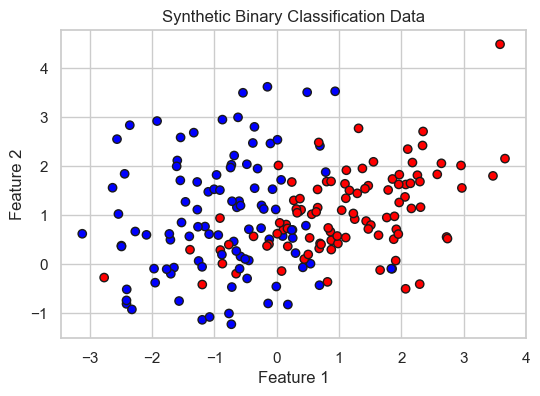

Log Loss: 0.3665
Accuracy: 0.84


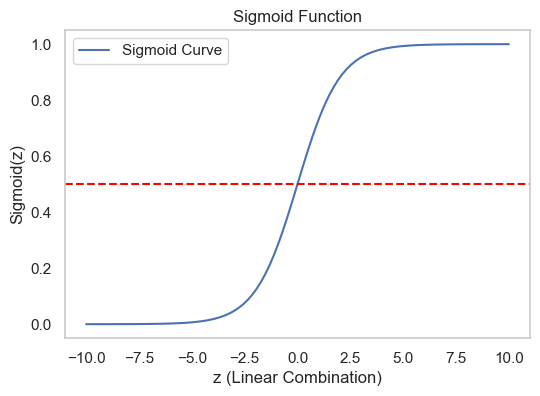

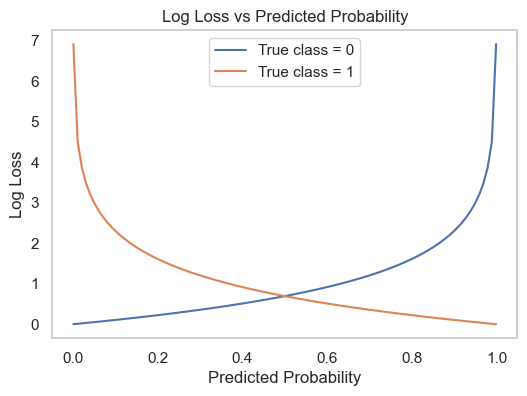

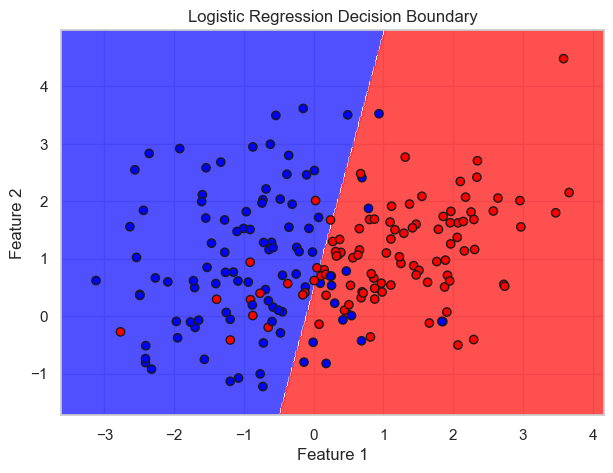

In [1]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
import seaborn as sns

sns.set(style="whitegrid")

# Generate synthetic data
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, 
                           n_clusters_per_class=1, random_state=42)

# Visualize the data
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="bwr", edgecolor="k")
plt.title("Synthetic Binary Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Train logistic regression model
model = LogisticRegression()
model.fit(X, y)

# Predict probabilities and labels
y_prob = model.predict_proba(X)[:, 1]
y_pred = model.predict(X)

# Log Loss (MLE objective)
loss = log_loss(y, y_prob)
acc = accuracy_score(y, y_pred)
print(f"Log Loss: {loss:.4f}")
print(f"Accuracy: {acc:.2f}")

# Sigmoid function visualization
z = np.linspace(-10, 10, 100)
sigmoid = 1 / (1 + np.exp(-z))

plt.figure(figsize=(6, 4))
plt.plot(z, sigmoid, label="Sigmoid Curve")
plt.axhline(0.5, color='red', linestyle='--')
plt.title("Sigmoid Function")
plt.xlabel("z (Linear Combination)")
plt.ylabel("Sigmoid(z)")
plt.grid()
plt.legend()
plt.show()

# Log loss visualization
eps = 1e-15
p = np.linspace(0.001, 0.999, 100)
loss_0 = -np.log(1 - p + eps)  # True class is 0
loss_1 = -np.log(p + eps)      # True class is 1

plt.figure(figsize=(6, 4))
plt.plot(p, loss_0, label="True class = 0")
plt.plot(p, loss_1, label="True class = 1")
plt.title("Log Loss vs Predicted Probability")
plt.xlabel("Predicted Probability")
plt.ylabel("Log Loss")
plt.legend()
plt.grid()
plt.show()

# Decision boundary visualization
def plot_decision_boundary(X, y, model):
    h = .02  # step size in the mesh
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, alpha=0.8, cmap="bwr")
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', cmap="bwr")
    plt.title("Logistic Regression Decision Boundary")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

plot_decision_boundary(X, y, model)


# Multiclass Logistic Regression (Softmax) with Visualization

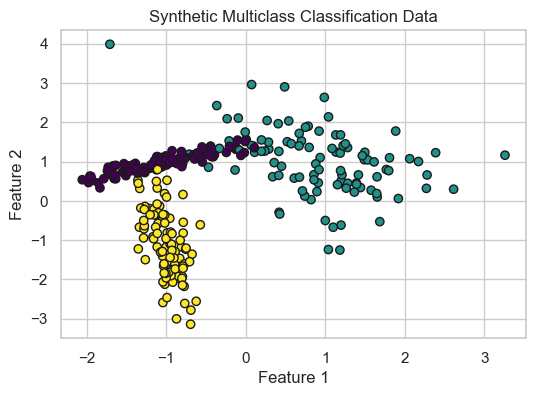

C:\Users\goura\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Accuracy: 0.92


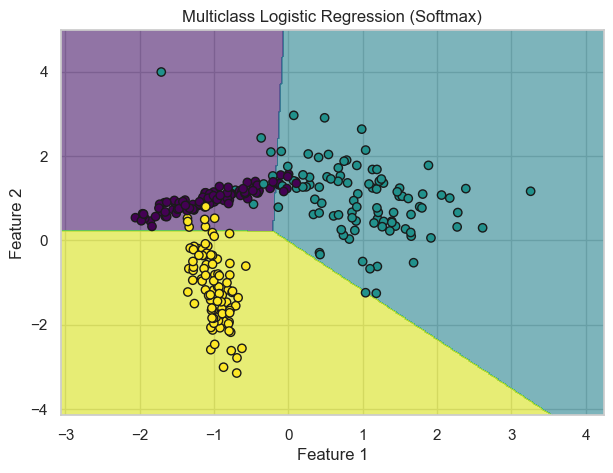

In [2]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns

sns.set(style="whitegrid")

# Generate synthetic 3-class classification data
X, y = make_classification(n_samples=300, n_features=2, n_redundant=0,
                           n_classes=3, n_clusters_per_class=1, random_state=42)

# Visualize the multiclass data
plt.figure(figsize=(6, 4))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', edgecolor='k')
plt.title("Synthetic Multiclass Classification Data")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

# Train Multinomial Logistic Regression
model = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model.fit(X, y)

# Predictions
y_pred = model.predict(X)
acc = accuracy_score(y, y_pred)
print(f"Accuracy: {acc:.2f}")

# Decision Boundary Plot Function
def plot_multiclass_decision_boundary(X, y, model, title="Decision Boundary"):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    h = 0.02  # step size
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure(figsize=(7, 5))
    plt.contourf(xx, yy, Z, cmap="viridis", alpha=0.6)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap="viridis", edgecolors='k')
    plt.title(title)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

# Plot the decision boundary
plot_multiclass_decision_boundary(X, y, model, title="Multiclass Logistic Regression (Softmax)")
